### Temporary Context Window Caveat

We have a known issue where prompts between 112K - 128K in length result in bad generations. We are working to get this resolved, and we appreciate your patience in the meantime.

In [6]:
import cohere
import json
co = cohere.Client(api_key="")
def complex_handler(obj):
    if hasattr(obj, '__dict__'):
        return obj.__dict__
    else:
        raise TypeError(f'Object of type {type(obj).__name__} is not JSON serializable')

In [9]:
response = co.chat(
  model="command-r-plus",
  message="Where do the tallest penguins live?",
  documents=[
    {"title": "Tall penguins", "snippet": "Emperor penguins are the tallest."},
    {"title": "Penguin habitats", "snippet": "Emperor penguins only live in Antarctica."},
    {"title": "What are animals?", "snippet": "Animals are different from plants."}
  ])

In [10]:
print(json.dumps(response, default=complex_handler, indent=4))

{
    "text": "The tallest penguins are Emperor penguins, which live in Antarctica.",
    "generation_id": "bfe80d9a-e42e-46c4-aff6-7aa49a515c4c",
    "citations": [
        {
            "start": 4,
            "end": 41,
            "text": "tallest penguins are Emperor penguins",
            "document_ids": [
                "doc_0"
            ]
        },
        {
            "start": 57,
            "end": 68,
            "text": "Antarctica.",
            "document_ids": [
                "doc_1"
            ]
        }
    ],
    "documents": [
        {
            "id": "doc_0",
            "snippet": "Emperor penguins are the tallest.",
            "title": "Tall penguins"
        },
        {
            "id": "doc_1",
            "snippet": "Emperor penguins only live in Antarctica.",
            "title": "Penguin habitats"
        }
    ],
    "is_search_required": null,
    "search_queries": null,
    "search_results": null,
    "finish_reason": "COMPLETE",
    "tool_ca

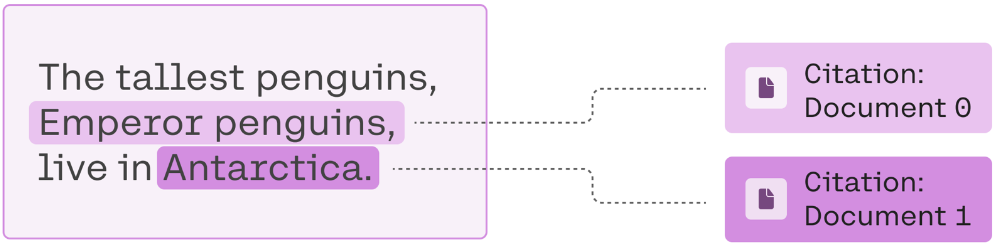